In [ ]:
#Image recognization use CNN
#CNN: CONVOLUTION NEURAL NETWROK
#Pre-requisites: for CNN
#1python
#2.Opencv
#3. tensorflow with keras: It is a Framework of DL

In [ ]:
#In CNN, there are total Four Layers:
"""
1.convolution Layer: to select primitive features
2.Relu Layer: Rectified layer unit, compare if value>=0 then keep same vallue otherwise 0
3.maxpooling: to shrink the image

"""

'\n1.convolution Layer: to select primitive features\n2.Relu Layer: Rectified layer unit, compare if value>=0 then keep same vallue otherwise 0\n3.maxpooling: to shrink the image\n\n'

In [ ]:
#use inbuilt dataset fashion_mnist
#import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow 
import cv2

In [ ]:
#load inbuilt dataset fashion_mnist whiuhc define in tensorflow .keras.datasets.fashion_mnist library
#load_data is a inbuilt method
(X_train,Y_train),(X_test,Y_test)=tensorflow.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
np.min(Y_train)

0

In [ ]:
np.max(Y_train)

9

In [ ]:
#total 10 classes[0....9]

In [ ]:
type(X_train),type(X_test)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

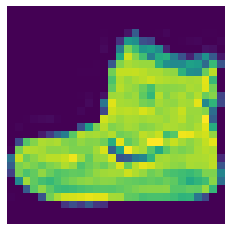

In [ ]:
plt.imshow(X_train[0])
plt.axis("off")
plt.show()

In [ ]:
Y_train[0] #show category for frst image

9

In [ ]:
#Category user defined list object
"""
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


"""
category=["T-shirt/top","Trouser"," Pullover","Dress","Coat","Sandal","Shirt",
          "Sneaker","Bag","Ankle boot"]
print(category)

['T-shirt/top', 'Trouser', ' Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
for i,v in enumerate(category):
  print(i,v)


0 T-shirt/top
1 Trouser
2  Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


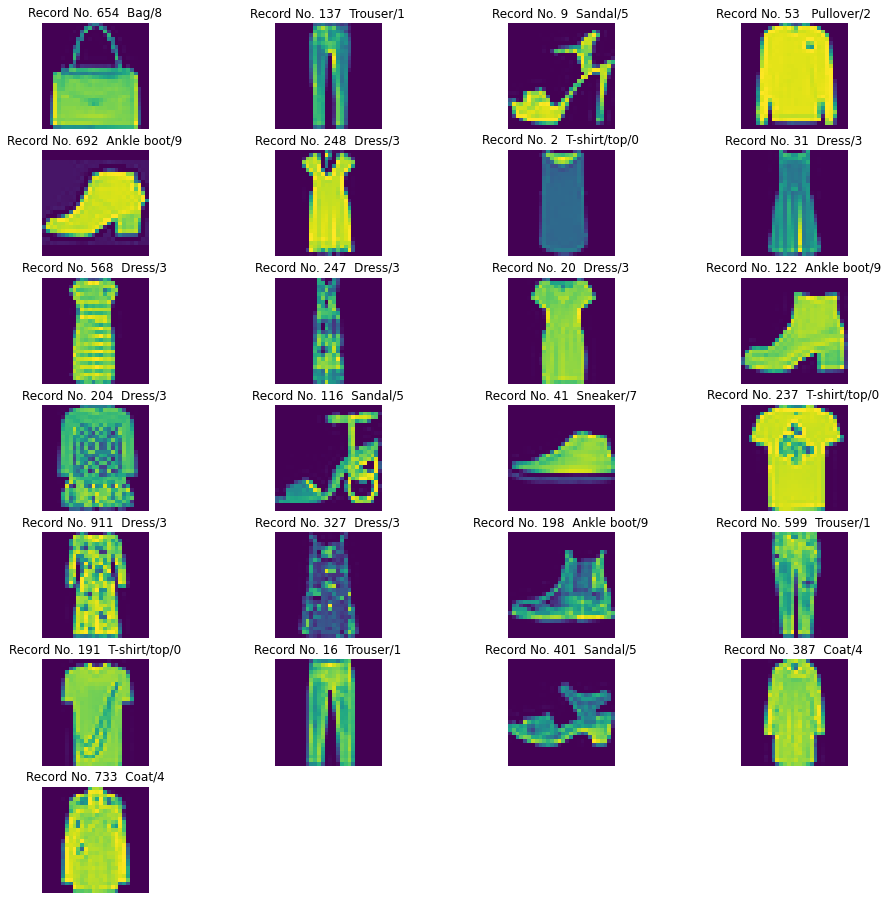

In [ ]:
#to show 25 images randomly from first 1000 images
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(7,4,j);j=j+1
  plt.imshow(X_train[i])
  plt.axis("off")
  plt.title("Record No. {}  {}/{}".format(i,category[Y_train[i]],Y_train[i]))

In [ ]:
X_train.ndim,X_test.ndim

(3, 3)

In [ ]:
#compulsory : 4 dimension input images required for training and then testing 
#but we have a 3 dimension input images
#check dimension of X_train and X_test
print("Dimension of training data : ",X_train.ndim)
#to show shape of X_train
print("Shape of training data :",X_train.shape)

Dimension of training data :  3
Shape of training data : (60000, 28, 28)


In [ ]:
print("Dimension of testing data : ",X_test.ndim)
#to show shape of X_train
print("Shape of testing  data :",X_test.shape)

Dimension of testing data :  3
Shape of testing  data : (10000, 28, 28)


In [ ]:
#converts 3 dimension images into 4 dimensions, use inbuilt function
#expand_dims() which define in numpy library
#frst converts 3d X_train input images to 4 dimesnion :
X_train=np.expand_dims(X_train,-1) #-1 mns axis=-1 and in right side
print(X_train.ndim) #check dimension of X_train
print(X_train.shape)# check shape of X_train

4
(60000, 28, 28, 1)


In [ ]:
#Now  converts 3d X_test input images to 4 dimesnion :
X_test=np.expand_dims(X_test,-1) #-1 mns axis=-1 and in right side
print(X_test.ndim) #check dimension of X_test
print(X_test.shape)# check shape of X_test

4
(10000, 28, 28, 1)


In [ ]:
#Apply Scaling fo X_train and X_test input images, Apply MinMaxScaler mns Normalized:
#it is also known as feature scaling
X_train=X_train/255
X_test=X_test/255



In [ ]:
"""
or from sklearn.preprocessing import MinMaxScaler
#create the object of MinMaxScaler
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

"""

'\nor from sklearn.preprocessing import MinMaxScaler\n#create the object of MinMaxScaler\nmms=MinMaxScaler()\nX_train=mms.fit_transform(X_train)\nX_test=mms.transform(X_test)\n\n'

In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
#X_train ,Y_trainn : 60000 samples
#split training data into 80% and 20%
#80% mns for training and 20% mns for validation purpose
#mns to check overfitiing the model in each iteration(epoch)
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,
                                             random_state=1)

In [ ]:
X_train.shape,X_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

In [ ]:
#Perform the model:model Building with CNN(Convolution neural network)
#create the object of sequential class
model=tensorflow.keras.models.Sequential([
    #frst layer conventional layer
   tensorflow.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),
                                 padding='valid',activation='relu',input_shape=[28,28,1]),
                                 
                                 tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 tensorflow.keras.layers.Flatten(),
  
      #frst hidden layer
   tensorflow.keras.layers.Dense(units=128,activation='relu'),
              #output layer
   tensorflow.keras.layers.Dense(units=10,activation='softmax')                      

])

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#create a procedure for early stopping
#call inbuilt class: EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
#creatre the object of EarlyStopping class
cb=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
    )

In [ ]:
#train the model : use inbuilt method fit() of Sequemtial class
trained_model=model.fit(X_train,Y_train,batch_size=512,epochs=5000,
                        validation_data=(X_val,Y_val),callbacks=cb)

Epoch 1/5000
96/96 [==============================] - 35s 358ms/step - loss: 0.6163 - accuracy: 0.7966 - val_loss: 0.4053 - val_accuracy: 0.8561
Epoch 2/5000
96/96 [==============================] - 26s 273ms/step - loss: 0.3689 - accuracy: 0.8719 - val_loss: 0.3498 - val_accuracy: 0.8728
Epoch 3/5000
96/96 [==============================] - 25s 265ms/step - loss: 0.3222 - accuracy: 0.8875 - val_loss: 0.3119 - val_accuracy: 0.8882
Epoch 4/5000
96/96 [==============================] - 25s 263ms/step - loss: 0.2906 - accuracy: 0.8979 - val_loss: 0.2932 - val_accuracy: 0.8948
Epoch 5/5000
96/96 [==============================] - 27s 279ms/step - loss: 0.2707 - accuracy: 0.9044 - val_loss: 0.2946 - val_accuracy: 0.8942
Epoch 6/5000
96/96 [==============================] - 26s 267ms/step - loss: 0.2563 - accuracy: 0.9101 - val_loss: 0.2701 - val_accuracy: 0.9030
Epoch 7/5000
96/96 [==============================] - 25s 261ms/step - loss: 0.2425 - accuracy: 0.9126 - val_loss: 0.2718 - val_ac

In [ ]:
#model evaluation
#evaluate training score and loss
print("Training loss and accuracy :",model.evaluate(X_train,Y_train))
#evaluate validation score and loss
print("Testing loss and accuracy :",model.evaluate(X_val,Y_val))

1500/1500 [==============================] - 10s 6ms/step - loss: 0.0455 - accuracy: 0.9874
Training loss and accuracy : [0.04553651437163353, 0.9874374866485596]
375/375 [==============================] - 2s 5ms/step - loss: 0.2905 - accuracy: 0.9181
Testing loss and accuracy : [0.2904569208621979, 0.9180833101272583]


In [ ]:
#test the model  with 30% data
Y_pred=model.predict(X_test).round(2)

313/313 [==============================] - 2s 5ms/step


In [ ]:
Y_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.34, 0.  , 0.  ]], dtype=float32)

In [ ]:
#select index of highest probablity class
#use list comprehension
Y_pred=[np.argmax(i) for i in Y_pred]
print(Y_pred)

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1, 6, 6, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 4, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 0, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 6, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4, 1, 3, 5, 2, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 6, 5, 4, 9, 4, 2, 8, 6, 4, 2, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 0, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 6, 0, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 4, 2, 4, 7, 1, 6, 4, 8, 2, 6, 5, 4, 2, 7, 7, 7, 3, 3, 7, 0, 

In [ ]:
class1=[category[i] for i in Y_pred]
class1

['Ankle boot',
 ' Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker',
 'Coat',
 'Sandal',
 'Bag',
 'Dress',
 'Coat',
 'Trouser',
 ' Pullover',
 'Coat',
 'Bag',
 'T-shirt/top',
 ' Pullover',
 'Sandal',
 'Sneaker',
 'Sandal',
 'Trouser',
 ' Pullover',
 'Shirt',
 'T-shirt/top',
 'Ankle boot',
 'Dress',
 'Bag',
 'Bag',
 'Dress',
 'Dress',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sandal',
 'Sneaker',
 'Ankle boot',
 'T-shirt/top',
 'Trouser',
 'Shirt',
 'Sneaker',
 'Shirt',
 'Sneaker',
 ' Pullover',
 'Trouser',
 'Shirt',
 'Shirt',
 'Coat',
 'Coat',
 'Sandal',
 'Bag',
 ' Pullover',
 ' Pullover',
 'Bag',
 'Coat',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sneaker',
 'Bag',
 'Sandal',
 'Trouser',
 'Trouser',
 ' Pullover',
 'Coat',
 'Sneaker',
 'Bag',
 'Sneaker',
 'T-shirt/top',
 ' Pullover',
 'Shirt',
 'Coat',
 'Dress',
 'Trouser',
 ' Pullover',
 'Bag',
 'Coat',
 'Trouser',
 'Bag',
 'Sandal',
 'Ankle boot',
 'Sandal',
 'T-shirt/top',
 'Dress',
 ' Pullover

In [ ]:
#generate report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.85      0.85      1000
           3       0.93      0.90      0.91      1000
           4       0.85      0.89      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.77      0.74      0.75      1000
           7       0.94      0.99      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

[[876   0  14   9   5   1  87   1   7   0]
 [  4 979   1   7   4   0   4   0   1   0]
 [ 23   1 851   9  49   1  64   0   2   0]
 [ 26   8  14 898  26   0  24   0   4   0]
 [  2   1  57  19 886   0  35   0   0   0]
 [  1   0   0   0   0 974 

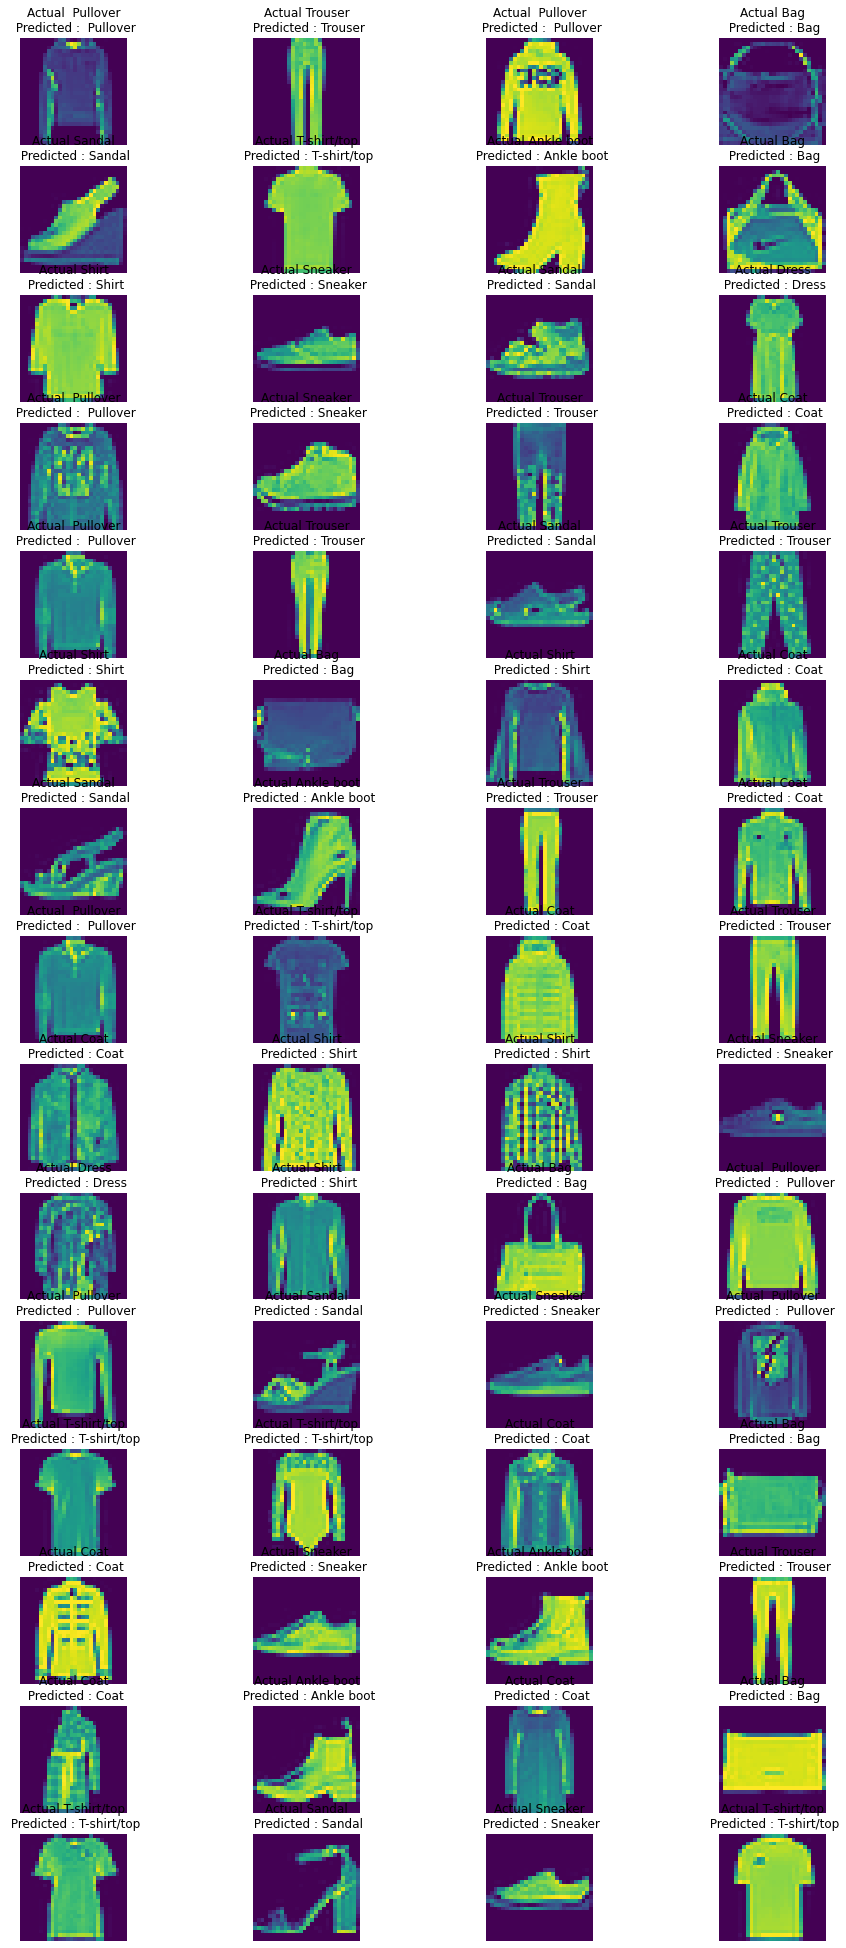

In [ ]:
#to show 25 images randomly from first 1000 images
plt.figure(figsize=(16,35))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(15,4,j);j=j+1
  plt.imshow(X_test[i].reshape(28,28))
  plt.axis("off")
  plt.title("Actual {}\n Predicted : {}".format(category[Y_test[i]],category[Y_test[i]]))

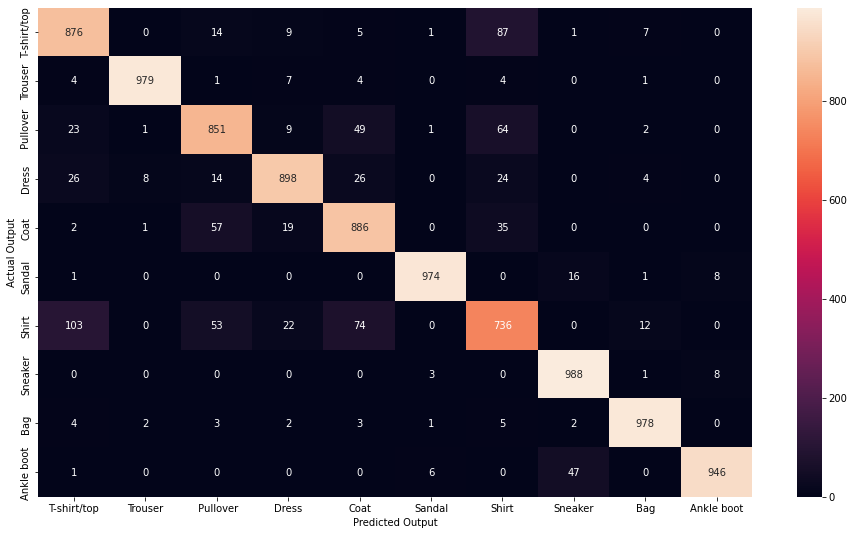

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True,fmt="d",xticklabels=category,yticklabels=category)
#fmt mns format and d mns int
plt.xlabel("Predicted Output")
plt.ylabel("Actual Output")
plt.show()